# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#extra'>Extra dataset mining</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset has the following columns:

>**id:** Identification No.&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;**imdb_id:** IMDB Identification No.&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;**popularity:** How Popular is the Movie<br>**budget:** Movies Cost&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;**revenue:** Movie Income&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;&emsp;&emsp;&ensp;&emsp;&ensp;&nbsp;**original_title:** Movie Name<br>**cast:** The Actors&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;**homepage:** Movie Website&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&emsp;**director:** Director Name<br>**tagline:** Slogan&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;**keywords:** Used in searching for movies&emsp;&emsp;&emsp;&emsp;&emsp;**overview:** Description<br>**runtime:** Duration&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;**genres:** Categories&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&emsp;**production_companies:** Creators<br>**release_date:** Availablity date&emsp;&emsp;&emsp;&emsp;**vote_count:** No. of Votes&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;**vote_average:** User Rating Average<br>**release_year:** Launching year&emsp;&emsp;&emsp;&ensp;&nbsp;**budget_adj:** Budget in terms of 2010 USD&emsp;&emsp;&emsp;&emsp;**revenue_adj:** Revenue in terms of 2010 USD              

### Question(s) for Analysis
 
>1- Which genres are most popular from year to year?<br><br>
2- What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
plt.rcParams['figure.dpi'] = 100


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
pd.set_option('max_columns', None)
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"



### Data Cleaning
> Let's dive into the dataset and explore the data structure and quality<br>
#### 1) Explore DataFrame information

In [4]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### 2) Delete Unnecessary Columns:


><u>Let's try ask some questions related to our dataset to discover the necessary columns and which are not:</u><br>
- What is the most profitable genre for production companies?
- What is the most favorable genre for the viewers?
- Does the name of the director affect the movie popularity and its profit?
- Does the higher budjet movies always profitable?
- Is the cast an important factor in the popularity and the Box office of the movies?
- Is choosing the release month important? does it have an impact on the revenue?
<br><br>
<u>**Until we discover a new questions related to our dataset the following columns will be treated as follows:**</u> <br><br>
- **(id, runtime, imdb_id, original_title, homepage, tagline, keywords, overview )** are removed
- **(vote_count)** beside **(popularity)** columns may be useful in dicovering the trending genre with the viewers.
- Some qualitative columns are very important for our analysis such as **(genres, cast, and director)** so they are kept.

In [5]:
# Deleted unnecessary columns 
tmdb.drop(['id','imdb_id','homepage', 'tagline', 'keywords', 
           'overview','runtime'], axis=1, inplace=True)


In [6]:
tmdb.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,0.65,"14,625,701.09","39,823,319.79",217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,1.00,"30,913,213.83","117,003,486.58",575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,0.21,0.00,0.00,17.00,5.40,"1,995.00",0.00,0.00
50%,0.38,0.00,0.00,38.00,6.00,"2,006.00",0.00,0.00
75%,0.71,"15,000,000.00","24,000,000.00",145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,32.99,"425,000,000.00","2,781,505,847.00","9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


**3) Now let's check columns for NA values**

In [7]:
tmdb.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>As we see above, we have 3 columns with NA, instead of dropping them we can fill them with the word 'Unavailable'

In [8]:
tmdb.fillna({'director': 'Unavailable','genres': 'Unavailable',
                    'cast': 'Unavailable','production_companies':'Unavailable'}, inplace=True)


**4) Check the numerical columns for Zero values**

In [9]:
tmdb['revenue_adj'].value_counts()[0]

6016

In [10]:
tmdb['budget_adj'].value_counts()[0]


5696

In [11]:
tmdb['revenue'].value_counts()[0]


6016

In [12]:
tmdb['budget'].value_counts()[0]


5696

> We have a large number of zero values in 4 columns **revenue, budjet, revenue_adj, and budjet_adj** , replacing these values with the mean or median will affect the quality of the analysis badly, so, it is prefered to drop them all.

In [13]:
# These lines to keep +ve values only:
tmdb = tmdb[tmdb['revenue_adj'] > 0]
tmdb = tmdb[tmdb['budget_adj'] > 0]
tmdb = tmdb[tmdb['revenue'] > 0]
tmdb = tmdb[tmdb['budget'] > 0]
tmdb.reset_index(drop=True,inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 14 columns):
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
cast                    3855 non-null object
director                3855 non-null object
genres                  3855 non-null object
production_companies    3855 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 421.7+ KB


**5) Convert 'release_date' values to datetimelike to extract month and to save it in a new column:**

In [14]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])
tmdb['release month']=tmdb['release_date'].dt.month_name()

**6) Split the concatenated categorical data in columns (genre, cast,production_companies, and director):**

In [15]:
# split the values of genres column and remove the delimiter "|"
tmdb.genres=tmdb.genres.str.split('|')

# split the values of cast column and remove the delimiter "|"
tmdb.cast=tmdb.cast.str.split('|')


# split the values of director column and remove the delimiters "|" and "\n"
tmdb.director=tmdb.director.apply(str).str.replace('|', '\n')
tmdb.director=tmdb.director.str.split('\n')

# split the values of director column and remove the delimiters "|" and "\n"
tmdb.production_companies=tmdb.production_companies.apply(str).str.replace('|', '\n')
tmdb.production_companies=tmdb.production_companies.str.split('\n')

<a id='eda'></a>
## Exploratory Data Analysis


### Prerequisites

In order to deal with our dataset in efficient way we will define some function to do the follwing jobs:<br>
> **1)** Create a list of unique Categorical values from genres, cast, movies, and director.<br>
**2)** Create an empty dataframe, then fill its values with 0s in order to store the new manipulated data.<br>
**3)** Data manipulation, and aggregation and storing these data inside the previously created dataframe.<br>
**4)** Rank the new data according the case.<br>

For the above required functionalities we will define four functions as follows:
>* **categories_list()**: to return the categories as a list required by Pivot_Table() function.<br>
* **empty_table()**: Return a new dataframe filled with 0s which it will be used as template by Pivot_Table() function<br>
* **Pivot_Table()**: The most important function by which we do the manipulation and iteration over out dataset to answer the analysis questions<br>
* **rank()**: take the dataframe from Pivot_Table() and rank the data per year, or do cumulative rank over years, It has the ability to either aggregate by sum or by count methods.
* **myPlot()**: Take a dictionary of options and return the required plot, e.g. bar, or pie chart


In [16]:
def categories_list(col):
    """Function to return the categories as a list
       required by Pivot_Table function"""
    _list=[]
    for i in tmdb[col]:
        for j in i:
            if j not in _list:
                _list.append(j)
    return _list
    

In [17]:
def empty_table(itr):
    """Function to create a dataframe filled with 0s
       to be used as input for Pivot_Table() function"""
    df=pd.DataFrame(index=itr,columns=years)
    df=df.fillna(0)
    return df

In [18]:
def Pivot_Table(ct,cv):
    """Function to produce and fill the new dataframe
       accordng to the asked question"""
    if ct != 'd':
        if (ct == 'g' or ct == 'p'):# Set index to genres
            idx='genres'
            itr=genres
        if ct == 'c':# Set index to movie's cast
            idx='cast'
            itr=cast
        if ct == 'm':# Set index to release month
            idx='release month'
            itr=months
        if ct == 's':# Set index to Studios
            idx='production_companies'
            itr=studios
    else: # Set index to movie's director
        idx='director'
        itr=directors
      
    Piv_Tble = empty_table(itr)
    y=0 #This to define the year location in the yrs array for each iteration
    
    for x in tmdb[idx]:
        for i in itr:
            if i in x:
                if ct=='g': # this's the control condition
                    Piv_Tble.loc[i,yrs[y]]+=1 # Fill according to Genres
                else:
                    Piv_Tble.loc[i,yrs[y]]+=tmdb[cv][y] # Fill according to Choice
                 
        y+=1
    # This is to normalize any DataFrame that depends on Popularity to unify the ranges
    if cv=='popularity':
        Piv_Tble=Piv_Tble.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
       
    return Piv_Tble    

In [19]:
def rank(df0,y,c,IdxLis):
    """Function to display either the rank per year
       or the cumulative rank over years"""
    df=pd.DataFrame(data=[df0.idxmax().values,df0.max().values],
                        columns=df0.columns,index=[f"{IdxLis[0]}" ,f"{IdxLis[1]}"])
    if y!=1: # display rank by year
        return df
        
    else: # display rank by count over the analysis period
        # Transpose df in order to group by a categorical data on axis 0
        df=df.T
        if c==0:
            df=df.groupby(f"{IdxLis[0]}").sum() #Aggregate by sum
        else:
            df=df.groupby(f"{IdxLis[0]}").count() #Aggregate by count
        df.sort_values(by=f"{IdxLis[1]}", ascending=False ,inplace=True)
        df=df.T # Transpose back the dataframe and make it horizontal
        return df

In [20]:
def myPlot(options):
    """Function to plot either bar or pie graphs"""
    # Determine fig size
    fig = plt.figure(figsize=options["figsize"])
    # condition of bar graph
    if options["kind"]=="bar":
        plt.bar(range(len(options["categories"])), options["data"], color =options["color"],
                   tick_label=options["categories"])
        plt.xlabel(options["labels"][0])
        plt.ylabel(options["labels"][1])
        plt.xticks(rotation=90, ha='right')
    # condition of pie chart
    if options["kind"]=="pie":
        plt.pie(options["data"], labels = options["categories"], startangle = 90 ,
                explode  = options["explode"],autopct='%1.1f%%',labeldistance=1.05)
        plt.axis('equal')
        plt.tight_layout()
    plt.title(options["title"],fontweight='bold',loc='center')    
    plt.show()

In [21]:
# Now it's time to get a list of genres
genres= categories_list('genres')

Also, we need to create some lists and arrays as follows:<br>
>* Unique genres list
* Unique actors names list
* Unique directors names list
* Unique array of years
* an array of the values of 'release_year'

In [22]:
#Get a list of Actors
cast=categories_list('cast')


In [23]:
# Get a list of Directors
directors=categories_list('director')

In [24]:
# Get a list of Studios
studios=categories_list('production_companies')

In [25]:
# create an array of years range
years= np.arange(tmdb.release_year.min(),tmdb.release_year.max()+1,1)
# create an array of months
months=np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'])

In [26]:
# create an array of release year
yrs=np.array(tmdb.release_year)

## Now let us dive into our database:

### Q1) Which genres are most popular from year to year?
> ### Q1.1) Which genres are most popular from year to year according to producers?

>Let's analyze the popular Genre according to the <u> **Number of produced movies of each category** </u>:<br>
* for this we will create the main pivot table **Year_to_Year_Genres**, its values are the counts of movies of each genre per year:<br>

In [27]:
# Create a pivot table with genres with movies counts as values
Year_to_Year_Genres=Pivot_Table('g','movies')

The most popular genre in from year to year according to the number of movie per each genre per each year:

In [28]:
# Get the most popular genre according to the movies produced per year in 2000s
rank(Year_to_Year_Genres,0,0,["Top Genres","Counts"])

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Top Genres,Drama,Drama,Drama,Thriller,Drama,Drama,Action,Drama,Drama,Adventure,Drama,Thriller,Action,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Thriller,Drama,Thriller,Action,Comedy,Drama,Comedy,Comedy,Comedy,Drama,Comedy,Drama,Drama,Comedy,Drama,Drama,Thriller,Drama,Comedy,Drama,Comedy,Drama,Comedy,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
Counts,3,6,5,3,4,3,2,7,6,2,7,8,3,7,8,5,7,9,7,7,8,9,12,13,16,19,19,23,25,24,22,22,27,36,27,42,47,40,45,56,45,51,64,45,62,82,89,75,81,83,85,89,66,80,79,81


The results shows that Drama is the most dominant and prefered genre for the producers, the below table sums up the total movies per each genre during [1960-2015].

In [29]:
rank(Year_to_Year_Genres,1,0,["Genre","No. of Movies"])

Genre,Drama,Comedy,Thriller,Action,Adventure
No. of Movies,1410,292,73,21,2


In [30]:
rank(Year_to_Year_Genres,1,1,["Genre","Hit Years"])

Genre,Drama,Comedy,Thriller,Action,Adventure
Hit Years,38,9,5,3,1


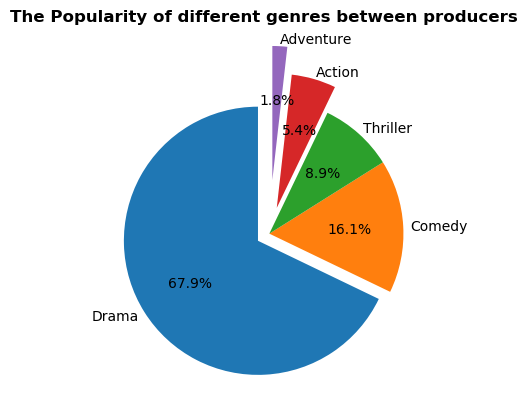

In [31]:
Pldata=rank(Year_to_Year_Genres,1,1,["Genre","Total"]).values.tolist()[0]
Plidx=rank(Year_to_Year_Genres,1,1,["Genre","Total"]).columns
myPlot({"kind":"pie","data":Pldata,"categories":Plidx,"figsize":(4,4),"explode":[0.1, 0, 0, 0.2,0.4],
        "title":"The Popularity of different genres between producers"})

### <font color=green>Drama is the most chosen genre by the producers #</font>

> ### Q1.2) Do viewers agree with producers in drama genre preference??

>To answer this question we will create the main pivot table **Year_to_Year_Popularity**, its values are the sum of the movies popularity per each genre per year:<br>

In [32]:
# Genres according to the movies popularotes per year
Year_to_Year_Popularity=Pivot_Table('p','popularity')

In [33]:
# Get the most popular genre and its score according to the movies Popularity per year
rank(Year_to_Year_Popularity,0,0,["Popular Genre","Score"])

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Popular Genre,Drama,Comedy,Adventure,Thriller,Comedy,Drama,Drama,Adventure,Mystery,Adventure,Comedy,Science Fiction,Drama,Drama,Drama,Drama,Drama,Adventure,Horror,Science Fiction,Action,Adventure,Science Fiction,Action,Action,Adventure,Drama,Comedy,Comedy,Comedy,Drama,Action,Thriller,Drama,Drama,Drama,Drama,Thriller,Drama,Drama,Comedy,Drama,Drama,Action,Comedy,Drama,Drama,Drama,Drama,Drama,Action,Action,Drama,Drama,Action,Action
Score,2.71,2.35,2.57,2.57,2.06,1.77,2.70,2.32,2.27,1.89,2.13,2.02,2.97,2.40,2.53,2.10,3.07,2.50,2.27,2.33,2.14,2.21,2.02,2.42,2.41,2.41,2.27,1.77,2.43,2.11,1.87,2.07,1.97,2.40,2.11,2.26,2.29,2.32,2.29,2.59,2.07,1.79,1.91,2.49,1.88,1.92,2.20,2.03,1.93,1.72,1.79,1.88,1.91,1.96,2.02,1.81


>The results shows that Drama is the most dominant and prefered genre for the viewers, the below table sums up the top genres by movies count per each genre during [1960-2015]:

In [34]:
rank(Year_to_Year_Popularity,1,1,["Popular Genre","Hit Years"])

Popular Genre,Drama,Action,Comedy,Adventure,Science Fiction,Thriller,Horror,Mystery
Hit Years,25,9,8,6,3,3,1,1


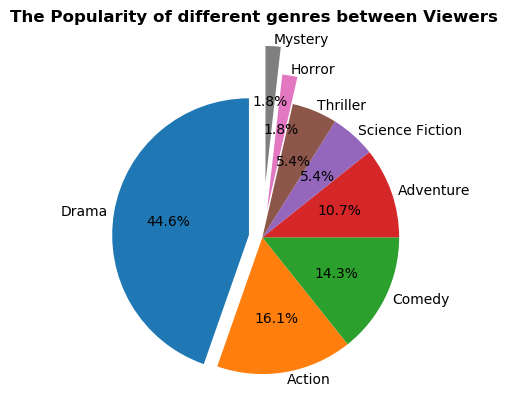

In [35]:
Pldata=rank(Year_to_Year_Popularity,1,1,["Popular Genre","Score"]).values.tolist()[0]
Plidx=rank(Year_to_Year_Popularity,1,1,["Popular Genre","Score"]).columns
myPlot({"kind":"pie","data":Pldata,"categories":Plidx,"figsize":(4,4),"explode":[0.1, 0, 0, 0,0,0,0.2,0.4],
       "title":"The Popularity of different genres between Viewers"})

### <font color=green>Drama is the most popular genre between the viewers #</font>

### Q2) What kinds of properties are associated with movies that have high revenues?

If i'm a viewer, critic, or producer what does make me think that a certain movie is successful?<br><br>
>The answer to this question is the key of our analysis, in the insight of the dataset the answer could be:<br>
* Popular and grossing Actor
* Popular and grossing Director
* Professional Production Studios
* Suitable Showtime (Summer vacation, Holidays, etc..)
* High Budjet

>### Q2.1) Who are the top grossing Actors?<br>
>to answer this question we will create the main pivot tables **Actor_Revenue**, its values are the sum of movies revenue for each actor/actress<br>


In [36]:
# A dataframe contains the revenue of each Actor/Actress per year
Actor_Revenue= Pivot_Table('c','revenue_adj')

>Now let's check the most grossing Actors/Actresses over the period from 1960 to 2015 by calling **rank()** function  with the suitable parameters as follows:

In [37]:
rank(Actor_Revenue,1,0,["Actor","Gross Profit"])

Actor,Harrison Ford,Sam Worthington,Kate Winslet,Helena Bonham Carter,Ellen Burstyn,Sean Connery,Orlando Bloom,Chris Hemsworth,Richard Dreyfuss,Sandra Bullock,Drew Barrymore,Tom Cruise,Maggie Smith,Laura Dern,Rod Taylor,Ian McKellen,Ian McDiarmid,Ewan McGregor,Phil Harris,Ben Kingsley,Robbie Coltrane,Al Pacino,Bill Nighy,Samuel L. Jackson,Sylvester Stallone,Ben Stiller,Johnny Depp,James Earl Jones,Joe Pesci,Will Smith,Cate Blanchett,Christopher Plummer,Helen Hunt,Ned Beatty,Tom Hanks,Kevin Costner,Madeline Kahn,Julia Roberts,Ali MacGraw,Kate Capshaw,Michael Douglas,Roger Moore,Barbra Streisand,Robert Redford,Alec Guinness,Jean Simmons,Maurice Evans,Richard Burton
Gross Profit,"9,179,277,861.13","3,204,567,101.84","2,506,405,735.42","2,393,984,527.00","2,167,324,901.20","2,113,748,240.49","2,102,697,297.21","1,925,559,777.38","1,907,005,841.92","1,843,567,094.17","1,791,694,309.25","1,784,410,628.73","1,603,739,559.58","1,592,839,495.64","1,574,814,739.70","1,566,886,213.02","1,479,739,016.75","1,453,169,600.49","1,345,551,058.99","1,308,819,326.84","1,294,335,468.69","1,277,913,732.39","1,275,925,075.37","1,238,667,445.91","1,218,071,674.51","1,185,150,628.57","1,170,507,132.47","1,159,591,590.01","1,157,455,540.14","1,135,764,351.59","1,134,896,410.16","1,129,534,861.99","1,088,316,353.20","1,003,538,977.39","980,079,178.19","954,090,273.46","909,988,095.21","875,319,368.77","766,072,642.11","739,419,677.85","698,533,308.23","631,857,706.73","616,903,382.58","608,151,066.34","504,591,421.51","442,378,047.43","418,709,421.00","226,643,572.37"


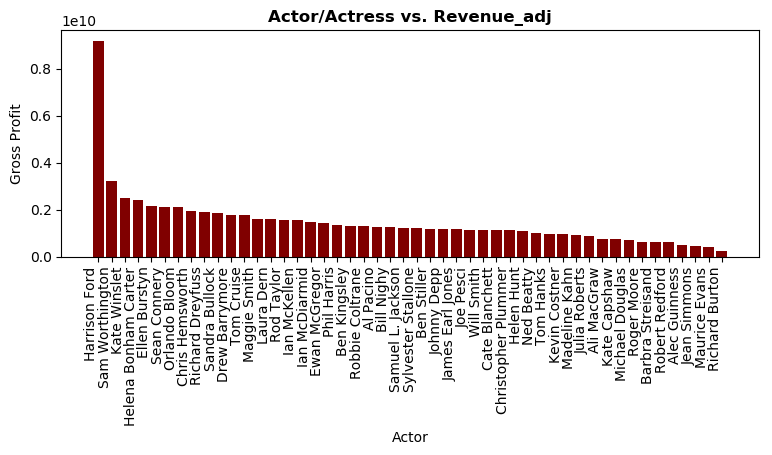

In [38]:
Pldata=rank(Actor_Revenue,1,0,["Actor","Gross Profit"]).values.tolist()[0]
Plidx=rank(Actor_Revenue,1,0,["Actor","Gross Profit"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(9,3),"color":"maroon",
       "labels":["Actor","Gross Profit"],"title":"Actor/Actress vs. Revenue_adj"})

In [39]:
rank(Actor_Revenue,1,1,["Actor","Hit Years"])

Actor,Harrison Ford,Sean Connery,Tom Cruise,Al Pacino,Madeline Kahn,Maggie Smith,Maurice Evans,Michael Douglas,Ned Beatty,Orlando Bloom,Phil Harris,Richard Burton,Richard Dreyfuss,Robbie Coltrane,Kevin Costner,Robert Redford,Rod Taylor,Roger Moore,Sam Worthington,Samuel L. Jackson,Sandra Bullock,Sylvester Stallone,Tom Hanks,Laura Dern,Kate Winslet,Alec Guinness,Ellen Burstyn,Ali MacGraw,Barbra Streisand,Ben Kingsley,Ben Stiller,Bill Nighy,Cate Blanchett,Chris Hemsworth,Christopher Plummer,Drew Barrymore,Ewan McGregor,Kate Capshaw,Helen Hunt,Helena Bonham Carter,Ian McDiarmid,Ian McKellen,James Earl Jones,Jean Simmons,Joe Pesci,Johnny Depp,Julia Roberts,Will Smith
Hit Years,6,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


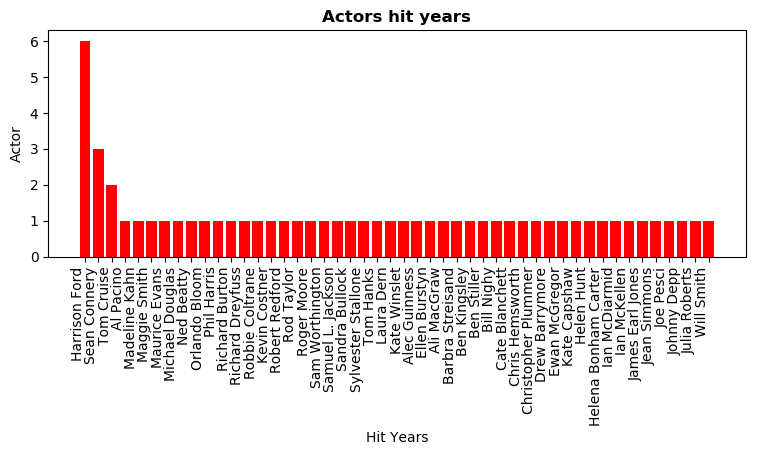

In [40]:
Pldata=rank(Actor_Revenue,1,1,["Actor","Hit Years"]).values.tolist()[0]
Plidx=rank(Actor_Revenue,1,1,["Actor","Hit Years"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(9,3),"color":"red",
       "labels":["Hit Years","Actor"],"title":"Actors hit years"})

>>### <font color=green>So, except for Harrison Ford, Sean Connery, and Tom Cruise the rest of Actors/Actresses names appeared onetime only in top grossing</u></font> 

>### Q2.2) Who are the top grossing Directors?<br>
>to answer this question we will create the main pivot tables **Director_Revenue**, its values are the sum of movies revenue for each director<br>


In [41]:
Director_Revenue=Pivot_Table('d','revenue_adj')

>let's check the most grossing Directors over the period from 1960 to 2015 by calling **rank()** function with the suitable parameters as follows:

In [42]:
rank(Director_Revenue,1,0,["Director","Gross Profit"])

Director,Steven Spielberg,James Cameron,George Lucas,Wolfgang Reitherman,William Friedkin,Gore Verbinski,Peter Jackson,J.J. Abrams,Irwin Winkler,Robert Zemeckis,Guy Hamilton,Joss Whedon,Irvin Kershner,Lana Wachowski,David Yates,Francis Ford Coppola,Richard Marquand,Chris Columbus,Chris Buck,Rob Minkoff,Roland Emmerich,Robert Wise,Lee Unkrich,Conrad Vernon,Christopher Nolan,Richard Donner,Mike Newell,Mel Brooks,Jerry Zucker,Stanley Kubrick,Ron Clements,Arthur Hiller,Michael Bay,Tony Scott,Barry Levinson,Lewis Gilbert,Frank Pierson,Adrian Lyne,George Roy Hill,Terence Young,David Lean,Mike Nichols
Gross Profit,"8,171,065,411.06","6,166,097,763.64","3,999,692,772.73","2,920,365,798.69","2,167,324,901.20","2,163,344,859.78","2,002,654,743.56","1,902,723,129.80","1,583,049,536.35","1,513,475,846.93","1,502,763,009.62","1,443,191,435.21","1,424,626,187.77","1,379,262,008.93","1,287,183,997.56","1,277,913,732.39","1,253,818,981.12","1,202,518,036.07","1,192,711,491.12","1,159,591,590.01","1,135,764,351.59","1,129,534,861.99","1,063,171,911.00","1,061,903,622.74","1,014,733,032.48","1,003,538,977.39","1,000,352,539.23","909,988,095.21","842,793,762.86","797,924,644.64","783,306,265.86","766,072,642.11","740,815,170.22","709,881,085.22","654,259,434.36","631,857,706.73","616,903,382.58","614,385,336.77","608,151,066.34","561,773,358.99","504,591,421.51","226,643,572.37"


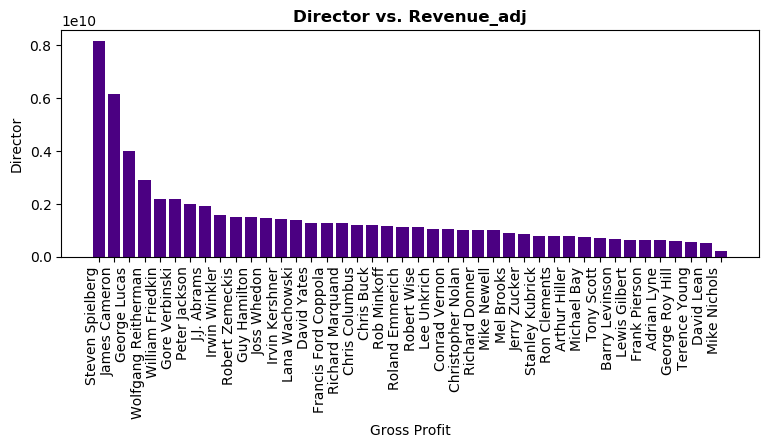

In [43]:
Pldata=rank(Director_Revenue,1,0,["Director","Gross Profit"]).values.tolist()[0]
Plidx=rank(Director_Revenue,1,0,["Director","Gross Profit"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(9,3),"color":"indigo",
       "labels":["Gross Profit","Director"],"title":"Director vs. Revenue_adj"})

In [44]:
rank(Director_Revenue,1,1,["Director","Hit years"])

Director,Steven Spielberg,James Cameron,Wolfgang Reitherman,Robert Zemeckis,Peter Jackson,Guy Hamilton,Gore Verbinski,George Lucas,Stanley Kubrick,Roland Emmerich,Ron Clements,Robert Wise,Lewis Gilbert,Rob Minkoff,Terence Young,Richard Marquand,Richard Donner,Tony Scott,William Friedkin,Mike Nichols,Mike Newell,Michael Bay,Mel Brooks,Adrian Lyne,Lee Unkrich,Arthur Hiller,Barry Levinson,Chris Buck,Chris Columbus,Christopher Nolan,Conrad Vernon,David Lean,David Yates,Francis Ford Coppola,Frank Pierson,George Roy Hill,Irvin Kershner,Irwin Winkler,J.J. Abrams,Jerry Zucker,Joss Whedon,Lana Wachowski
Hit years,6,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


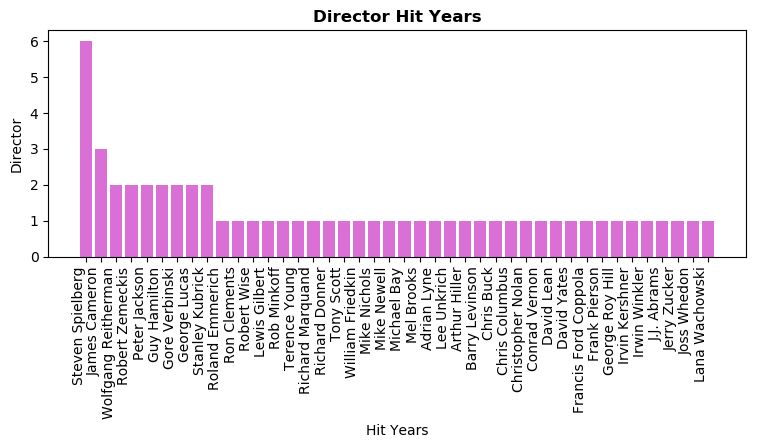

In [45]:
Pldata=rank(Director_Revenue,1,1,["Director","Hit years"]).values.tolist()[0]
Plidx=rank(Director_Revenue,1,1,["Director","Hit years"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(9,3),"color":"orchid",
       "labels":["Hit Years","Director"],"title":"Director Hit Years"})

>>### <font color=green>So, to have a movie with high revenue the production studios almost hire one of the above ِdirectors especially <u>Steven Spielberg, James Cameron, or George Lucas.</u></font> 

>### Q2.3) What are the top Production Studios?<br>
>to answer this question we will create the main pivot tables **Studio_Revenue**, its values are the sum of movies revenue for each studio<br>

In [46]:
Studio_Revenue=Pivot_Table('s','revenue_adj')

>Now we check the most grossing Studios over the period from 1960 to 2015 by calling **rank()** function with the suitable parameters as follows:

In [47]:
rank(Studio_Revenue,1,0,["Studio","Gross Profit"])

Studio,Warner Bros.,Universal Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Walt Disney Pictures,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Dune Entertainment,Relativity Media,Touchstone Pictures,DreamWorks SKG,Walt Disney Productions,Lucasfilm,Crossbow Productions,Carolco Pictures,United Artists,Danjaq,Bryna Productions,Chenault Productions
Gross Profit,"28,068,760,284.24","16,184,361,302.06","13,989,969,221.97","11,483,889,978.01","7,780,504,363.46","5,679,152,831.17","4,727,712,527.09","3,789,622,713.18","3,131,871,306.62","3,039,737,867.95","2,225,165,522.11","1,574,814,739.70","1,424,626,187.77","909,988,095.21","887,672,918.83","715,029,178.73","561,773,358.99","442,378,047.43","226,643,572.37"


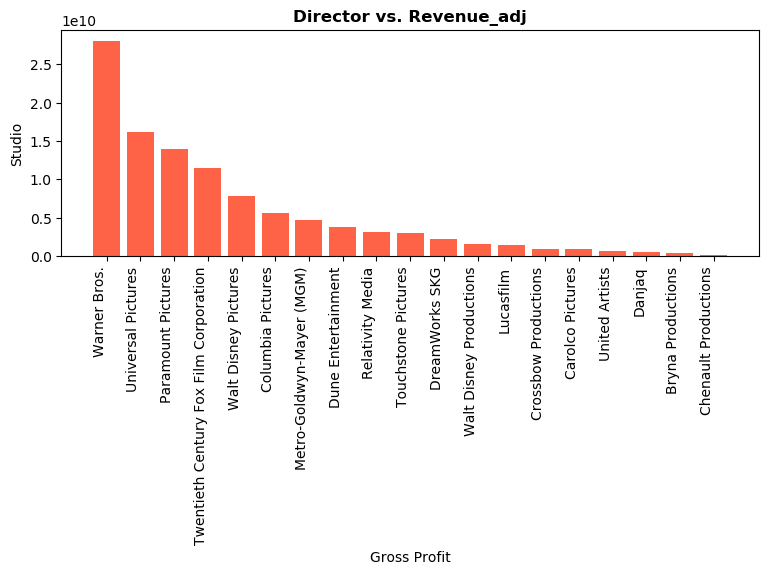

In [48]:
Pldata=rank(Studio_Revenue,1,0,["Studio","Gross Profit"]).values.tolist()[0]
Plidx=rank(Studio_Revenue,1,0,["Studio","Gross Profit"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(9,3),"color":"tomato",
       "labels":["Gross Profit","Studio"],"title":"Director vs. Revenue_adj"})

In [56]:
rank(Studio_Revenue,1,1,["Studio","Hit Years"])

Studio,Warner Bros.,Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Metro-Goldwyn-Mayer (MGM),Walt Disney Pictures,Touchstone Pictures,Columbia Pictures,Danjaq,DreamWorks SKG,Dune Entertainment,Lucasfilm,Carolco Pictures,Crossbow Productions,Relativity Media,United Artists,Chenault Productions,Walt Disney Productions,Bryna Productions
Hit Years,11,8,8,6,5,3,2,2,1,1,1,1,1,1,1,1,1,1,1


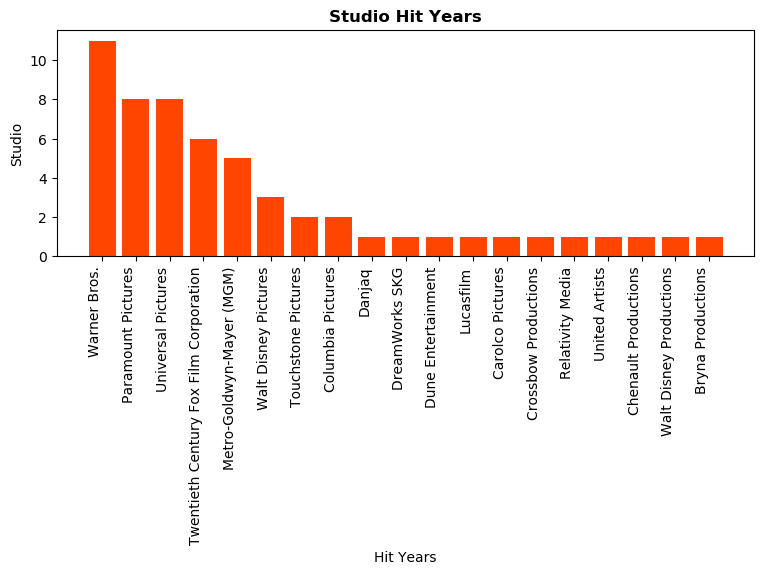

In [50]:
Pldata=rank(Studio_Revenue,1,1,["Studio","Gross Profit"]).values.tolist()[0]
Plidx=rank(Studio_Revenue,1,1,["Studio","Gross Profit"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(9,3),"color":"orangered",
       "labels":["Hit Years","Studio"],"title":"Studio Hit Years"})

>>### <font color=green>So, to have a movie with high revenue the production studio is almost one of the above studios especially <u>Warner Bros., Universal Pictures, or Paramount Pictures.</u></font> 

>### Q2.4) What are the best months to release a movie?<br>
>to answer this question we will create the main pivot tables **Month_Revenue**, its values are the sum of movies revenue for each month<br>

In [51]:
Month_Revenue=Pivot_Table('m','revenue_adj')

>Now we check the best months to release high revenue movies over the period from 1960 to 2015 by calling **rank()** function with the suitable parameters as follows:

In [52]:
rank(Month_Revenue,1,1,["Month","Gross Profit"])

Month,June,December,May,July,November,September,April,January,March,October
Gross Profit,17,16,5,4,3,3,2,2,2,2


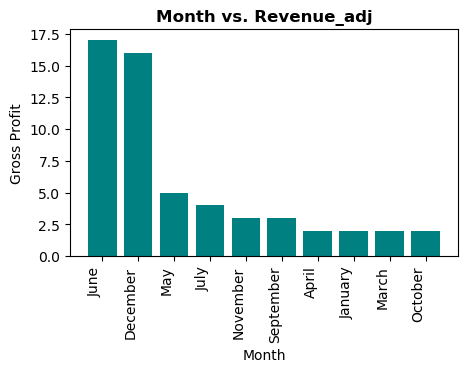

In [53]:
Pldata=rank(Month_Revenue,1,1,["Month","Gross Profit"]).values.tolist()[0]
Plidx=rank(Month_Revenue,1,1,["Month","Gross Profit"]).columns
myPlot({"kind":"bar","data":Pldata,"categories":Plidx,"figsize":(5,3),"color":"teal",
       "labels":["Month","Gross Profit"],"title":"Month vs. Revenue_adj"})

>>### <font color=green>To guarantee the highest possible revenue the production studios should choose **summer vacation or christmas holidays** as shown above, the analysis shows that <u>June</u> is the most profitable month followed by <u>December</u>.</font>

<a id='extra'></a>
## Extra dataset mining:

In [54]:
corr = tmdb.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1,0.45,0.62,0.78,0.32,0.17,0.4,0.55
budget,0.45,1,0.69,0.56,0.024,0.27,0.96,0.53
revenue,0.62,0.69,1,0.75,0.23,0.14,0.66,0.9
vote_count,0.78,0.56,0.75,1,0.39,0.21,0.5,0.65
vote_average,0.32,0.024,0.23,0.39,1,-0.13,0.037,0.27
release_year,0.17,0.27,0.14,0.21,-0.13,1,0.075,-0.1
budget_adj,0.4,0.96,0.66,0.5,0.037,0.075,1,0.57
revenue_adj,0.55,0.53,0.9,0.65,0.27,-0.1,0.57,1


* there is a good +ve correlation between votes count and movie's popularity and revenue
* There is a medium +ve correlation between budjet and revenue.
* There is a small +ve correlation between vote average and movie's popularity and revenue.

<a id='conclusions'></a>
## Conclusions

* Drama is the most populare genre during the period under analysis. Production companies prouduced 1410 drama movies and drama productions volume occupied the 1st place in 38 years, also Drama genre occupied the 1st place in terms of Popularity in 25 years.

* The top grossing and popular genres are Drama, Action, Comedy, Adventure, Science Fiction, Thriller, Horror, and Mystery.
* Most of movies with high revenues hires one of the top grossing directors, e.g., Steven Spielberg, James Cameron, Wolfgang Reitherman, etc.
* Mega studios such as Warner Bros,	Paramount Pictures,	Universal Pictures,	Twentieth Century Fox Film Corporation,	Metro-Goldwyn-Mayer (MGM), Walt Disney Pictures are the key producers of movies with high revenues.
* Most of movies with high revenues are released in sumer vacation and christmas holidays, especially months of June and December.
* Vote average is not an indicator of movie's revenue and popularity, but votes count is.
* High budjet is not always a feature of movies with high revenue.
* Unfortunately, The analysis couldn't answer the easiest question about the significance of cast in movies revenue due to having Zero values in 6016 elements in revenue_adj column? so. the dataset need to be completed with the real revenue data from themoviedb.org (TMDB) in order to answer this question, however, the analysis shows that a movie starring Harrison Ford, Sean Connery, or Tom Cruise is a movie with high chances to be top grossing.


In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0